In [95]:
import pandas as pd
import numpy as np

In [119]:
df1 =pd.read_excel("Item Ledger Entries -2019-20.xlsx")
df2 =pd.read_excel("Item Ledger Entries- 2020-21.xlsx")
df3 =pd.read_excel("Item Ledger Entries 2021-22.xlsx")
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,Control1000000015,Posting Date,Projects Code,Item No.,Document No.,Issue Note No.,Item Description,Quantity,Resource No.,Resource FA No.,...,Shipped Qty. Not Returned,Variant Code,Vendor No.,Entry No.,Gen. Prod. Posting Group,PO Ref. No.,Sub. Project,Positive,Project No.,Vendor Name
0,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,NaN,DIESEL,-174.0,NaN,NaN,...,0.0,NaN,NaN,3262413,FUEL,NaN,NaN,False,NaN,NaN
1,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,NaN,DIESEL,174.0,NaN,NaN,...,0.0,NaN,NaN,3262414,FUEL,NaN,NaN,True,NaN,NaN
2,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,NaN,DIESEL,-30.0,NaN,NaN,...,0.0,NaN,NaN,3262416,FUEL,NaN,NaN,False,NaN,NaN
3,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,NaN,DIESEL,30.0,NaN,NaN,...,0.0,NaN,NaN,3262417,FUEL,NaN,NaN,True,NaN,NaN
4,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207996,NaN,DIESEL,-30.0,NaN,NaN,...,0.0,NaN,NaN,3262449,FUEL,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123057,ELECTRICAL MATERIAL,2022-03-31,3-04300,70470,IJNL/ONKA/0001554,ISN-00346993,DIESEL,-60.0,R0191,V406,...,-60.0,NaN,NaN,6225295,FUEL,NaN,NaN,False,NaN,NaN
123058,BUILDING FURNITURE,2022-03-31,5-00300,70470,IJNL/GDC/0000076,ISN-00347084,DIESEL,-280.0,NaN,NaN,...,-280.0,NaN,NaN,6226329,FUEL,NaN,NaN,False,NaN,NaN
123059,FUEL -SITE,2022-03-31,5-00311,70470,IJNL/GDC/0000080,ISN-00347095,DIESEL,-1300.0,NaN,NaN,...,-1300.0,NaN,NaN,6226436,FUEL,NaN,NaN,False,NaN,NaN
123060,STOCK CONTROL ACCOUNT,2022-03-30,8-01200,70470,300139,NaN,DIESEL,-190.0,NaN,NaN,...,0.0,NaN,NaN,6228719,FUEL,NaN,NaN,False,NaN,NaN


In [120]:
df.columns

Index(['Control1000000015', 'Posting Date', 'Projects Code', 'Item No.',
       'Document No.', 'Issue Note No.', 'Item Description', 'Quantity',
       'Resource No.', 'Resource FA No.', 'Resource Reg. No.', 'Description 2',
       'Subcontractor', 'Carcass No.', 'Referred Item', 'Unit of Measure',
       'Cost Amount (Actual)', 'Location Code', 'Applied Entry to Adjust',
       'Description', 'Completely Invoiced', 'Cost Amount (Actual) (ACY)',
       'Control1000000014', 'Cost Amount (Expected)',
       'Cost Amount (Expected) (ACY)', 'Cost Amount (Non-Invtbl.)',
       'Cost Amount (Non-Invtbl.)(ACY)', 'Document Line No.', 'Document Type',
       'Entry Type', 'Expiration Date', 'Invoiced Quantity', 'Lot No.',
       'Maintenance Order No.', 'Maintenance Order Type', 'Open',
       'Order Line No.', 'Order No.', 'Order Type',
       'Prod. Order Comp. Line No.', 'Project Task No.',
       'Qty. per Unit of Measure', 'Remaining Quantity', 'Reserved Quantity',
       'Return Reason C

In [121]:
df[['Posting Date','Quantity']]

,Posting Date,Quantity
0,2019-04-01,-174.0
1,2019-04-01,174.0
2,2019-04-01,-30.0
3,2019-04-01,30.0
4,2019-04-01,-30.0
...,...,...
123057,2022-03-31,-60.0
123058,2022-03-31,-280.0
123059,2022-03-31,-1300.0
123060,2022-03-30,-190.0


In [122]:
df.dtypes

Control1000000015                         object
Posting Date                      datetime64[ns]
Projects Code                             object
Item No.                                   int64
Document No.                              object
Issue Note No.                            object
Item Description                          object
Quantity                                 float64
Resource No.                              object
Resource FA No.                           object
Resource Reg. No.                         object
Description 2                             object
Subcontractor                             object
Carcass No.                              float64
Referred Item                            float64
Unit of Measure                           object
Cost Amount (Actual)                     float64
Location Code                             object
Applied Entry to Adjust                     bool
Description                               object
Completely Invoiced 

In [123]:
df.isnull().sum()

Control1000000015                      0
Posting Date                           0
Projects Code                          0
Item No.                               0
Document No.                           0
Issue Note No.                     43057
Item Description                       0
Quantity                               0
Resource No.                       68031
Resource FA No.                    71362
Resource Reg. No.                  98466
Description 2                      86768
Subcontractor                     121700
Carcass No.                       123062
Referred Item                     123036
Unit of Measure                       18
Cost Amount (Actual)                   0
Location Code                          0
Applied Entry to Adjust                0
Description                       123052
Completely Invoiced                    0
Cost Amount (Actual) (ACY)             0
Control1000000014                      0
Cost Amount (Expected)                 0
Cost Amount (Exp

In [124]:
# Remove columns that have any null values
df = df.dropna(axis=1)

In [125]:
df.isnull().sum()

Control1000000015                 0
Posting Date                      0
Projects Code                     0
Item No.                          0
Document No.                      0
Item Description                  0
Quantity                          0
Cost Amount (Actual)              0
Location Code                     0
Applied Entry to Adjust           0
Completely Invoiced               0
Cost Amount (Actual) (ACY)        0
Control1000000014                 0
Cost Amount (Expected)            0
Cost Amount (Expected) (ACY)      0
Cost Amount (Non-Invtbl.)         0
Cost Amount (Non-Invtbl.)(ACY)    0
Document Line No.                 0
Entry Type                        0
Invoiced Quantity                 0
Open                              0
Order Line No.                    0
Prod. Order Comp. Line No.        0
Qty. per Unit of Measure          0
Remaining Quantity                0
Reserved Quantity                 0
Sales Amount (Actual)             0
Sales Amount (Expected)     

In [126]:
df

,Control1000000015,Posting Date,Projects Code,Item No.,Document No.,Item Description,Quantity,Cost Amount (Actual),Location Code,Applied Entry to Adjust,...,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive
0,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,DIESEL,-174.0,-18574.50,4-01200,False,...,1.0,0.0,0,0,0,2.0 ROADS,0.0,3262413,FUEL,False
1,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,DIESEL,174.0,18574.50,IN - TRANS,False,...,1.0,0.0,0,0,0,2.0 ROADS,0.0,3262414,FUEL,True
2,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,DIESEL,-30.0,-3075.00,6-00600,False,...,1.0,0.0,0,0,0,5.0 HEAD OFFICE,0.0,3262416,FUEL,False
3,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,DIESEL,30.0,3075.00,IN - TRANS,False,...,1.0,0.0,0,0,0,5.0 HEAD OFFICE,0.0,3262417,FUEL,True
4,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207996,DIESEL,-30.0,-3075.00,6-00600,False,...,1.0,0.0,0,0,0,5.0 HEAD OFFICE,0.0,3262449,FUEL,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123057,ELECTRICAL MATERIAL,2022-03-31,3-04300,70470,IJNL/ONKA/0001554,DIESEL,-60.0,-7230.00,3-04300,False,...,1.0,0.0,0,0,0,1.0 BUILDING,-60.0,6225295,FUEL,False
123058,BUILDING FURNITURE,2022-03-31,5-00300,70470,IJNL/GDC/0000076,DIESEL,-280.0,-33740.00,5-00300,False,...,1.0,0.0,0,0,0,8.0 DEVELOPMENTS,-280.0,6226329,FUEL,False
123059,FUEL -SITE,2022-03-31,5-00311,70470,IJNL/GDC/0000080,DIESEL,-1300.0,-217225.18,5-00311,False,...,1.0,0.0,0,0,0,8.0 DEVELOPMENTS,-1300.0,6226436,FUEL,False
123060,STOCK CONTROL ACCOUNT,2022-03-30,8-01200,70470,300139,DIESEL,-190.0,-33345.00,IN - TRANS,False,...,1.0,0.0,0,0,0,3.4 CRUSHER,0.0,6228719,FUEL,False


In [127]:
from sklearn.preprocessing import LabelEncoder

def encode_object_bool_features(df):
    df = df.copy()  # make a copy of the dataframe
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == object:
            df.loc[:, column] = le.fit_transform(df.loc[:, column])  # use .loc accessor to modify the original dataframe
        elif df[column].dtype == bool:
            df.loc[:, column] = df.loc[:, column].map({False: 0, True: 1})  # use .loc accessor to modify the original dataframe
    return df


In [128]:
df = encode_object_bool_features(df)

C:\Users\suritha\AppData\Local\Temp\ipykernel_7656\1504834376.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = le.fit_transform(df.loc[:, column])  # use .loc accessor to modify the original dataframe
C:\Users\suritha\AppData\Local\Temp\ipykernel_7656\1504834376.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = le.fit_transform(df.loc[:, column])  # use .loc accessor to modify the original dataframe
C:\Users\suritha\AppData\Local\Temp\ipykernel_7656\1504834376.py:8: DeprecationWarning: In a futur

In [129]:
df.columns

Index(['Control1000000015', 'Posting Date', 'Projects Code', 'Item No.',
       'Document No.', 'Item Description', 'Quantity', 'Cost Amount (Actual)',
       'Location Code', 'Applied Entry to Adjust', 'Completely Invoiced',
       'Cost Amount (Actual) (ACY)', 'Control1000000014',
       'Cost Amount (Expected)', 'Cost Amount (Expected) (ACY)',
       'Cost Amount (Non-Invtbl.)', 'Cost Amount (Non-Invtbl.)(ACY)',
       'Document Line No.', 'Entry Type', 'Invoiced Quantity', 'Open',
       'Order Line No.', 'Prod. Order Comp. Line No.',
       'Qty. per Unit of Measure', 'Remaining Quantity', 'Reserved Quantity',
       'Sales Amount (Actual)', 'Sales Amount (Expected)', 'Sbu Code',
       'Shipped Qty. Not Returned', 'Entry No.', 'Gen. Prod. Posting Group',
       'Positive'],
      dtype='object')

In [130]:
df.set_index('Posting Date', inplace=True)

In [131]:
df.head()

,Control1000000015,Projects Code,Item No.,Document No.,Item Description,Quantity,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,...,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive
Posting Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,12,46,70470,63,1,-174.0,-18574.5,46,0,1,...,1.0,0.0,0,0,0,1,0.0,3262413,1,0
2019-04-01,12,46,70470,63,1,174.0,18574.5,84,0,1,...,1.0,0.0,0,0,0,1,0.0,3262414,1,1
2019-04-01,12,67,70470,64,1,-30.0,-3075.0,65,0,1,...,1.0,0.0,0,0,0,12,0.0,3262416,1,0
2019-04-01,12,67,70470,64,1,30.0,3075.0,84,0,1,...,1.0,0.0,0,0,0,12,0.0,3262417,1,1
2019-04-01,12,67,70470,65,1,-30.0,-3075.0,65,0,1,...,1.0,0.0,0,0,0,12,0.0,3262449,1,0


In [132]:
df.loc[:,'QuantityAbs'] = df['Quantity'].abs()

In [133]:
df.drop(columns=['Quantity'],inplace=True)

In [134]:
df.head()

,Control1000000015,Projects Code,Item No.,Document No.,Item Description,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,Cost Amount (Actual) (ACY),...,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive,QuantityAbs
Posting Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,12,46,70470,63,1,-18574.5,46,0,1,0,...,0.0,0,0,0,1,0.0,3262413,1,0,174.0
2019-04-01,12,46,70470,63,1,18574.5,84,0,1,0,...,0.0,0,0,0,1,0.0,3262414,1,1,174.0
2019-04-01,12,67,70470,64,1,-3075.0,65,0,1,0,...,0.0,0,0,0,12,0.0,3262416,1,0,30.0
2019-04-01,12,67,70470,64,1,3075.0,84,0,1,0,...,0.0,0,0,0,12,0.0,3262417,1,1,30.0
2019-04-01,12,67,70470,65,1,-3075.0,65,0,1,0,...,0.0,0,0,0,12,0.0,3262449,1,0,30.0


In [135]:
train = df.loc[df.index < '2020-01-01']
test = df.loc[df.index >= '2022-01-01']

X_train = train.drop(columns='QuantityAbs')
y_train = train[['QuantityAbs']]

X_test = test.drop(columns='QuantityAbs')
y_test = test['QuantityAbs']

In [136]:
X_test

,Control1000000015,Projects Code,Item No.,Document No.,Item Description,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,Cost Amount (Actual) (ACY),...,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive
Posting Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,11,67,70470,15645,1,0.00,65,0,1,0,...,1.0,0.0,0,0,0,12,0.0,5902964,1,0
2022-01-03,11,67,70470,15645,1,0.00,84,0,1,0,...,1.0,0.0,0,0,0,12,0.0,5902965,1,1
2022-01-03,11,67,70470,15648,1,0.00,65,0,1,0,...,1.0,0.0,0,0,0,12,0.0,5903340,1,0
2022-01-03,11,67,70470,15648,1,0.00,84,0,1,0,...,1.0,0.0,0,0,0,12,0.0,5903341,1,1
2022-01-03,12,75,70470,15649,1,-10497.50,92,0,1,0,...,1.0,0.0,0,0,0,9,0.0,5903377,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,8,29,70470,31216,1,-7230.00,29,0,1,0,...,1.0,0.0,0,0,0,0,-60.0,6225295,1,0
2022-03-31,3,61,70470,26532,1,-33740.00,61,0,1,0,...,1.0,0.0,0,0,0,14,-280.0,6226329,1,0
2022-03-31,11,62,70470,26533,1,-217225.18,62,0,1,0,...,1.0,0.0,0,0,0,14,-1300.0,6226436,1,0


In [137]:
y_test.mean()

239.48551907577541

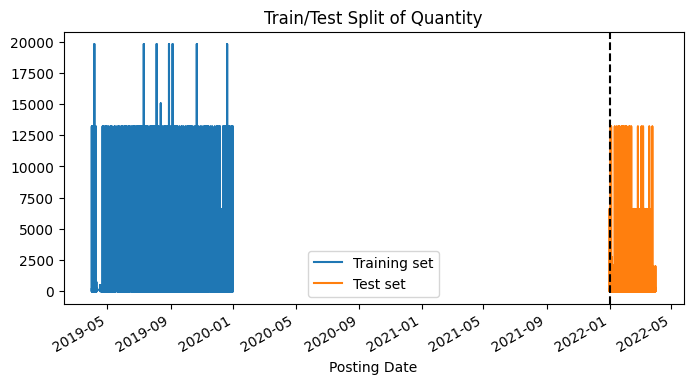

In [141]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,4))
train['QuantityAbs'].plot(ax=ax, label='Training set')
test['QuantityAbs'].plot(ax=ax, label='Test set')
ax.legend()
plt.title("Train/Test Split of Quantity")
ax.axvline('2022-01-01', color='black', ls='--')
plt.show()

In [142]:
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators=100, learning_rate = 0.1)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Accuracy of the train set: {:.3f}".format(reg.score(X_train,y_train)))
print("Accuracy of the test set: {:.3f}".format(reg.score(X_test,y_test)))
print("MSE of the test set: {:.3f}".format(mean_absolute_error(y_test,predictions)))

Accuracy of the train set: 1.000
Accuracy of the test set: 0.978
MSE of the test set: 8.889
